<a href="https://colab.research.google.com/github/henriquecbz/henriquecbz/blob/main/V_R_BIDI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from scipy.stats import norm

In [ ]:
bidi = yf.Ticker("BIDI4.SA")

data = yf.download("BIDI4.SA", start="2020-01-01",end="2022-01-01").get("Close")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Date
2020-01-02     5.229306
2020-01-03     5.322568
2020-01-06     5.745575
2020-01-07     5.838837
2020-01-08     5.788875
                ...    
2021-12-17    10.260000
2021-12-20     9.870000
2021-12-21     9.510000
2021-12-22     9.530000
2021-12-23     9.490000
Name: Close, Length: 491, dtype: float64

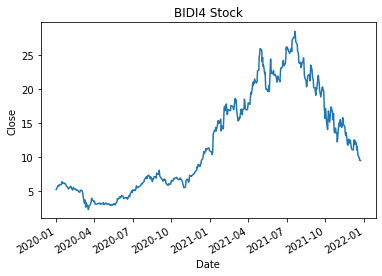

In [ ]:
data.plot()
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('BIDI4 Stock')
plt.show()

In [ ]:
bidi_dailyreturns = data.pct_change()
print(bidi_dailyreturns.head())

Date
2020-01-02         NaN
2020-01-03    0.017834
2020-01-06    0.079474
2020-01-07    0.016232
2020-01-08   -0.008557
Name: Close, dtype: float64


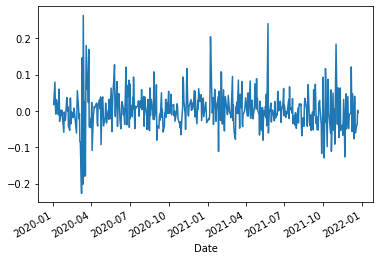

In [ ]:
bidi_dailyreturns.plot()
plt.show()

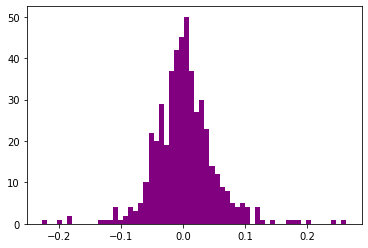

In [ ]:
plt.hist(bidi_dailyreturns, bins=60, color='purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


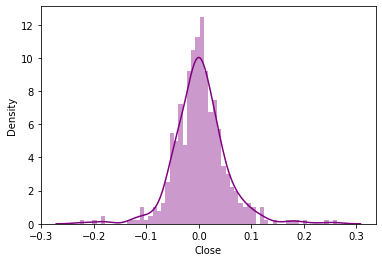

In [ ]:
sns.distplot(bidi_dailyreturns, hist=True, kde=True,bins=60, color='purple')

In [ ]:
mean = np.mean(bidi_dailyreturns)
std_dev = np.std(bidi_dailyreturns)
var=np.var(bidi_dailyreturns)

print('mean = '+'{:2%}'.format(mean))
print('standard deviation = '+'{:2%}'.format(std_dev))
print('variance = '+'{:2%}'.format(var))

mean = 0.251208%
standard deviation = 5.109326%
variance = 0.261052%


In [ ]:
days = 50
trials = 100
drift = mean - (0.5 * var)
Z = norm.ppf(np.random.rand(days,trials))
daily_returns = np.exp(drift + std_dev * Z)
daily_returns

array([[0.92925719, 0.97756008, 0.96258635, ..., 1.09175724, 1.03860636,
        0.97941882],
       [0.9648206 , 0.97805778, 0.97750144, ..., 0.98578191, 0.95615652,
        0.97447057],
       [1.00163908, 0.95879001, 1.02743553, ..., 0.94469373, 1.04594742,
        0.96481246],
       ...,
       [0.96185166, 1.0113625 , 0.99213994, ..., 0.98892721, 1.06137155,
        1.03321145],
       [0.92564415, 1.05075893, 0.95094601, ..., 0.95448998, 0.96519086,
        1.00323386],
       [1.03799967, 1.02817924, 0.95299791, ..., 1.03206689, 1.0424927 ,
        0.97779115]])

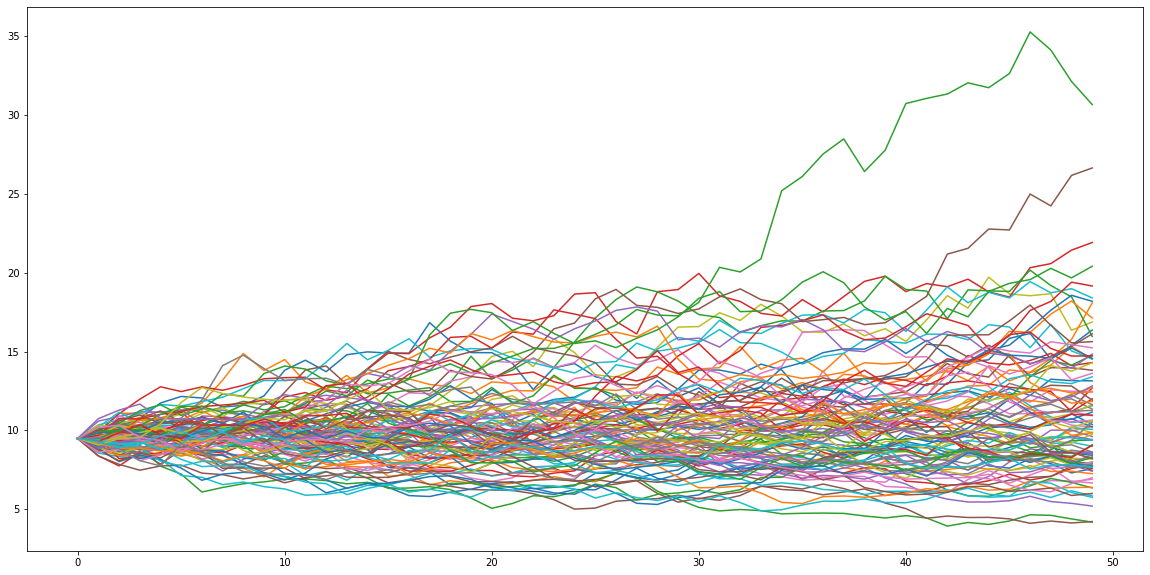

In [ ]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range (1,days):
  price_paths[t] = price_paths[t-1]*daily_returns[t]
plt.figure(figsize=(20,10))
plt.plot(price_paths)